# For the presentation

Use your generated dataset and __provide some “interesting” insights__ from the obtained data. For example, you can show which directors/actors participate most in the top 250 movies, or whether the number of received awards correlates with the BoxOffice/Gross value, etc. To this end, you can also incorporate further data, such as the number of awards for the directors and/or actors. 

You can also use __LinkedMDB__ for integrating additional information
> They are offline, but the latest RDF dump is here: http://www.cs.toronto.edu/~oktie/linkedmdb/. Use RDFLib to load that dataset and to query the graph for additional information


Intersting insights can be for example, 
- Which directors/actors participate most in the top 250 movies? 
- Does the number of received awards correlate with the BoxOffice/Gross value?
- Which directors have received the most awards and do more awards mean better movies?
- Which movie genre is most prominent in the the 250 movies?


## Suggestion for presentation

Show some interesting results during your presentation. Provide the source code for this “extra task” at presentation time via updating your Git repository. 






In [37]:
import numpy as np
import matplotlib.pyplot as plt
from rdflib import URIRef, Literal, Graph, Namespace
from rdflib.namespace import FOAF, RDF, RDFS, XSD, DC, OWL
from scipy.stats import pearsonr

%matplotlib notebook

In [38]:
EX = Namespace("https://ex1.org/")
DBO = Namespace("http://dbpedia.org/ontology/")
RSC = Namespace("http://philip-broehl.org/resource/")
WD = Namespace("http://www.wikidata.org/entity/")
WDT = Namespace("http://www.wikidata.org/prop/direct/")

<IPython.core.display.Javascript object>


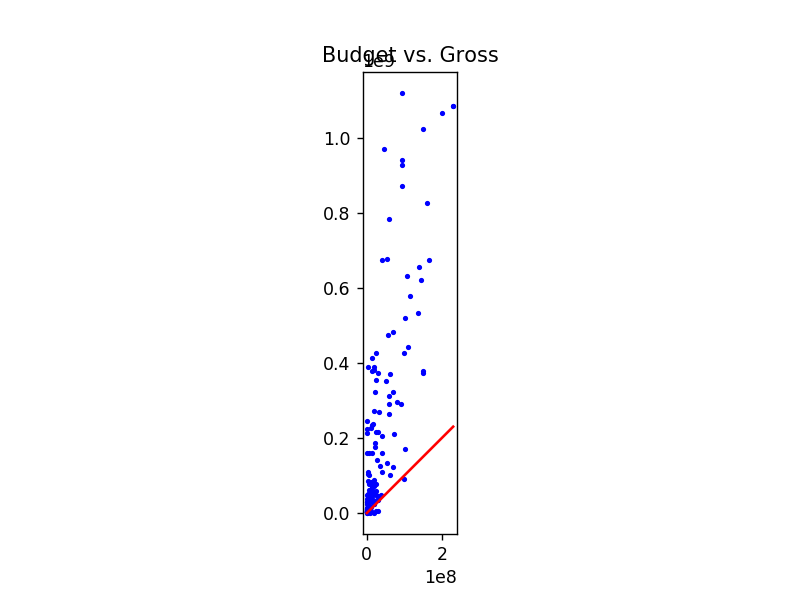

The pearson coefficient is 0.8072216797398191.


C:\Users\phili\Anaconda\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [140]:
g = Graph()
g.load(source = "../output_data/movies_task_3.n3", format = 'n3')

movies_with_budget_and_gross = set(g.subjects(predicate = DBO.gross)) & set(g.subjects(predicate = DBO.budget))
budgets = []
gross_values = []
for movie in movies_with_budget_and_gross:
    budgets.append(list(g.objects(subject = URIRef(movie), predicate = DBO.budget))[0])
    gross_values.append(list(g.objects(subject = URIRef(movie), predicate = DBO.gross))[0])
budgets = np.array([float(b) for b in budgets])
gross_values = np.array([float(v) for v in gross_values])

plt.figure()
plt.plot(budgets, gross_values, 'bo', markersize = 2)
plt.plot([0, 2.3e8], [0, 2.3e8], color = 'red')
plt.title("Budget vs. Gross")
plt.axes().set_aspect('equal', 'box')
print(f'The pearson coefficient is {pearsonr(budgets, gross_values)[0]}.')

<IPython.core.display.Javascript object>


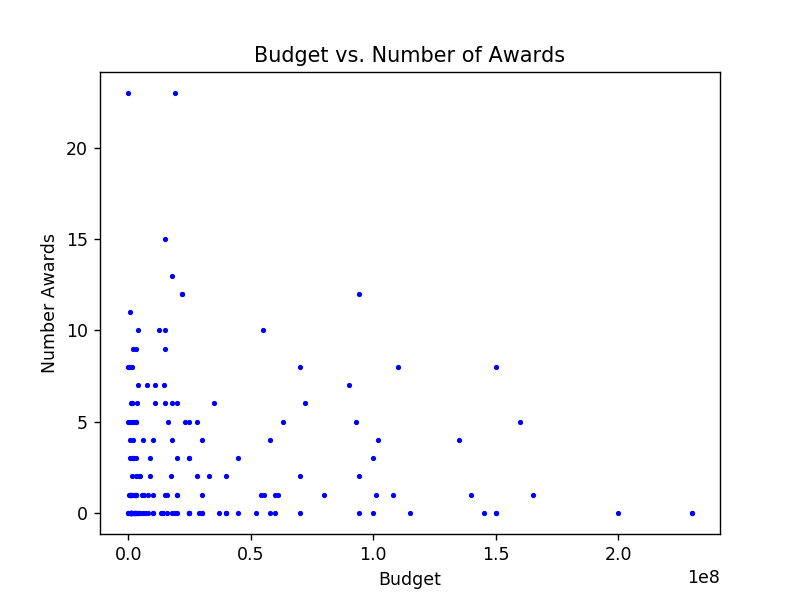

The pearson coefficient is -0.05570756539106926.


In [115]:
movies_with_budget = set(g.subjects(predicate = DBO.budget))
budgets = []
number_awards = []
for movie in movies_with_budget:
    budgets.append(list(g.objects(subject = URIRef(movie), predicate = DBO.budget))[0])
    number_awards.append(list(g.objects(subject = URIRef(movie), predicate = WDT.P166))[0])
budgets = [float(b) for b in budgets]
number_awards = [int(n) for n in number_awards]
plt.figure()
plt.plot(budgets, number_awards, 'bo', markersize = 2)
plt.title("Budget vs. Number of Awards")
plt.xlabel("Budget")
plt.ylabel("Number Awards")
plt.show()
print(f'The pearson coefficient is {pearsonr(budgets, number_awards)[0]}.')